
<style>
/*
.title {
    font-family: Arial, sans-serif;
    font-size: 24px;
    color: #2E86C1;
    text-align: center;
}    
*/
.paragraph {
    font-family: Georgia, serif;
    font-size: 16px;
    color: #e8df3c;
    line-height: 1.5;
}
</style>

# Importing Requiered Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


# Data Interpretation and Review

In [2]:
data = pd.read_csv("/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [4]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
data.tail()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server
39999,2023-10-10 11:59:52,14.102.21.108,109.198.45.7,50137,55575,ICMP,1175,Control,HTTP,Eligendi omnis voluptate nihil voluptatibus do...,...,Logged,Medium,Zaina Kumar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment A,"Pudukkottai, West Bengal",112.169.115.139,Log Data,Alert Data,Firewall


In [6]:
data.shape

(40000, 25)

In [7]:
print(f"there are {data.shape[0]} data in the dataset.")
data.isnull().sum()

there are 40000 data in the dataset.


Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

<p style="color:#fcba03; font-size:18px" >we already have some null data</p>

In [8]:
data.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

 <ul style="color:#fcba03; font-size:18px">
    <li> Some of data are really unique, </li>        
    <li> Some of them are have categoric, </li>        
    <li> And minority data is can be predictable.</li>
</ul>
<p style="color:#fcba03; font-size:18px">But we handle it later so we will apply <b>add_random_missing_values</b> function to dataset for creating null value as a bootcamp requirement.</p>

In [9]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [10]:
new_df = add_random_missing_values(data)

<p style="color:#fcba03; font-size:18px"> Lets review dataset again </p>

In [11]:
new_df.isnull().sum()

Timestamp                  2011
Source IP Address          1893
Destination IP Address     1961
Source Port                1961
Destination Port           1930
Protocol                   1961
Packet Length              1964
Packet Type                1983
Traffic Type               1860
Payload Data               1963
Malware Indicators        21053
Anomaly Scores             1901
Alerts/Warnings           21010
Attack Type                1953
Attack Signature           1929
Action Taken               1919
Severity Level             1881
User Information           1932
Device Information         1956
Network Segment            1956
Geo-location Data          2009
Proxy Information         20839
Firewall Logs             20894
IDS/IPS Alerts            21065
Log Source                 1934
dtype: int64

<p style="color:#fcba03; font-size:18px">Now we have so many null data for each column</p>

<p style="color:#fcba03; font-size:18px">First of all, let's examine the uniqueness of the each column. Because if there is categorical data that we can handle with prediction or mean value, we need to know which column has categoric data.</p>

In [12]:
new_df.nunique()

Timestamp                 37986
Source IP Address         38107
Destination IP Address    38039
Source Port               28709
Destination Port          28835
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              38037
Malware Indicators            1
Anomaly Scores             9777
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          31144
Device Information        30560
Network Segment               3
Geo-location Data          8696
Proxy Information         19160
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

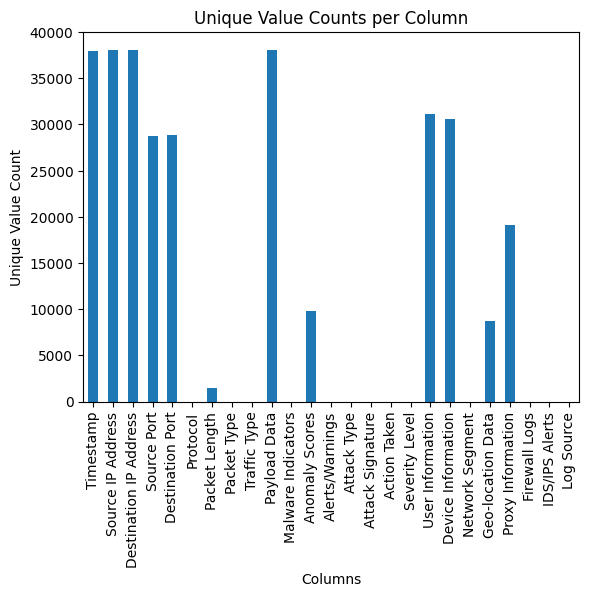

In [13]:
unique_counts = new_df.nunique()

# Bar grafik oluşturma
unique_counts.plot(kind='bar')
plt.title('Unique Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Unique Value Count')
plt.xticks(rotation=90)  # X eksenindeki sütun adlarını daha okunabilir hale getirir
plt.show()

<p style="color:#fcba03; font-size:18px">Let's categorize columns with their uniqueness. I specified bottom of the unique value count as 500. If a column have less than 500 unique data then we can handle with their data. If column's unique value count between 500 and 10000, we will examine the datas. And if column's unique data is above 10000 then we will think what we can do.</p>

In [14]:
bottom = 500
top = 10000
most_unique = {}
"""
most_unique:dict
{ column_name : unique_value_count:int } 
"""
few_unique = {}
"""
few_unique:dict
{ column_name : unique_value_count:int } 
"""
average_unique = {}
"""
average_unique:dict
{ column_name : unique_value_count:int } 
"""
for col, count in zip(new_df.columns ,unique_counts):
    if count < bottom:
        few_unique.update({col:count})
    elif (bottom < count) and (count < top):
        average_unique.update({col:count})
    else:
        most_unique.update({col:count})

print(few_unique.keys())
print()
print(average_unique.keys())
print()
print(most_unique.keys())

dict_keys(['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'])

dict_keys(['Packet Length', 'Anomaly Scores', 'Geo-location Data'])

dict_keys(['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Payload Data', 'User Information', 'Device Information', 'Proxy Information'])


<p style="color:#fcba03; font-size:18px">Few Unique Data</p>

In [15]:
# Let's see how is the categoric data in the columns which is have few unique data.
few_unique_values = {}
"""
few_unique_values:dict
{ column_name : [] } # column categoric values 
all values are alphabetic
"""
for column in few_unique.keys():
    few_unique_values.update({column: data[column].unique().tolist()})
for item in few_unique_values:
    print(item.ljust(20), ":", few_unique_values[item])

Protocol             : ['ICMP', 'UDP', 'TCP']
Packet Type          : ['Data', 'Control']
Traffic Type         : ['HTTP', 'DNS', 'FTP']
Malware Indicators   : ['IoC Detected', nan]
Alerts/Warnings      : [nan, 'Alert Triggered']
Attack Type          : ['Malware', 'DDoS', 'Intrusion']
Attack Signature     : ['Known Pattern B', 'Known Pattern A']
Action Taken         : ['Logged', 'Blocked', 'Ignored']
Severity Level       : ['Low', 'Medium', 'High']
Network Segment      : ['Segment A', 'Segment B', 'Segment C']
Firewall Logs        : ['Log Data', nan]
IDS/IPS Alerts       : [nan, 'Alert Data']
Log Source           : ['Server', 'Firewall']


In [16]:
# we need to encode the alpabetic data to numeric for better process.
encoder = LabelEncoder()

In [17]:
"""for column in few_unique.keys():
    # new_df[column] = encoder.fit_transform(new_df[column])
    # With this approach we save NaN values
    new_df[column] = new_df[column].apply(
        lambda x: encoder.fit_transform([x])[0] if pd.notna(x) else x
    )"""

'for column in few_unique.keys():\n    # new_df[column] = encoder.fit_transform(new_df[column])\n    # With this approach we save NaN values\n    new_df[column] = new_df[column].apply(\n        lambda x: encoder.fit_transform([x])[0] if pd.notna(x) else x\n    )'

In [18]:
"""fig, axes = plt.subplots(3,5, figsize=(20, 10)) 
fig.suptitle('Unique Value Counts per Few Unique Column', fontsize=16) 

# Grafikleri oluşturma
for idx, column in enumerate(few_unique.keys()):
    row, col = divmod(idx, 5)  # Satır ve sütun indekslerini hesapla
    axes[row, col].hist(new_df[column], bins=30)
    axes[row, col].set_title(f'{column} Distribution (Histogram)', fontsize=10)
    axes[row, col].set_xlabel('Values', fontsize=8)
    axes[row, col].set_ylabel('Frequency', fontsize=8)

# Boş hücreleri kaldırma (13 grafik için kalan 2 boş hücreyi temizleme)
for idx in range(len(few_unique.keys()), 3 * 5):
    row, col = divmod(idx, 5)
    axes[row, col].axis('off')  # Boş hücreyi görünmez yap

# Düzeni sıkılaştırma
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Genel başlık için alan bırakma
plt.show()"""

"fig, axes = plt.subplots(3,5, figsize=(20, 10)) \nfig.suptitle('Unique Value Counts per Few Unique Column', fontsize=16) \n\n# Grafikleri oluşturma\nfor idx, column in enumerate(few_unique.keys()):\n    row, col = divmod(idx, 5)  # Satır ve sütun indekslerini hesapla\n    axes[row, col].hist(new_df[column], bins=30)\n    axes[row, col].set_title(f'{column} Distribution (Histogram)', fontsize=10)\n    axes[row, col].set_xlabel('Values', fontsize=8)\n    axes[row, col].set_ylabel('Frequency', fontsize=8)\n\n# Boş hücreleri kaldırma (13 grafik için kalan 2 boş hücreyi temizleme)\nfor idx in range(len(few_unique.keys()), 3 * 5):\n    row, col = divmod(idx, 5)\n    axes[row, col].axis('off')  # Boş hücreyi görünmez yap\n\n# Düzeni sıkılaştırma\nplt.tight_layout()\nplt.subplots_adjust(top=0.9)  # Genel başlık için alan bırakma\nplt.show()"

<p style="color:#fcba03; font-size:18px">Average Unique Data</p>

In [19]:
# Let's see how is datas in the columns which is have average number of unique data.
for column, values in (average_unique.items()):
    print(f"{column} have ".ljust(25), values, "unique data.")
    print("Here is the 5 head row of the column.")
    print(new_df[column].head())
    print()

Packet Length have        1437 unique data.
Here is the 5 head row of the column.
0     503.0
1    1174.0
2     306.0
3     385.0
4    1462.0
Name: Packet Length, dtype: float64

Anomaly Scores have       9777 unique data.
Here is the 5 head row of the column.
0    28.67
1    51.50
2    87.42
3    15.79
4     0.52
Name: Anomaly Scores, dtype: float64

Geo-location Data have    8696 unique data.
Here is the 5 head row of the column.
0    Jamshedpur, Sikkim
1    Bilaspur, Nagaland
2     Bokaro, Rajasthan
3    Jaunpur, Rajasthan
4    Anantapur, Tripura
Name: Geo-location Data, dtype: object



In [20]:
new_df['Geo-location Data'] = encoder.fit_transform(new_df['Geo-location Data'])

# In addition, we record which data was encoded into which label data
Geo_Location_Data_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

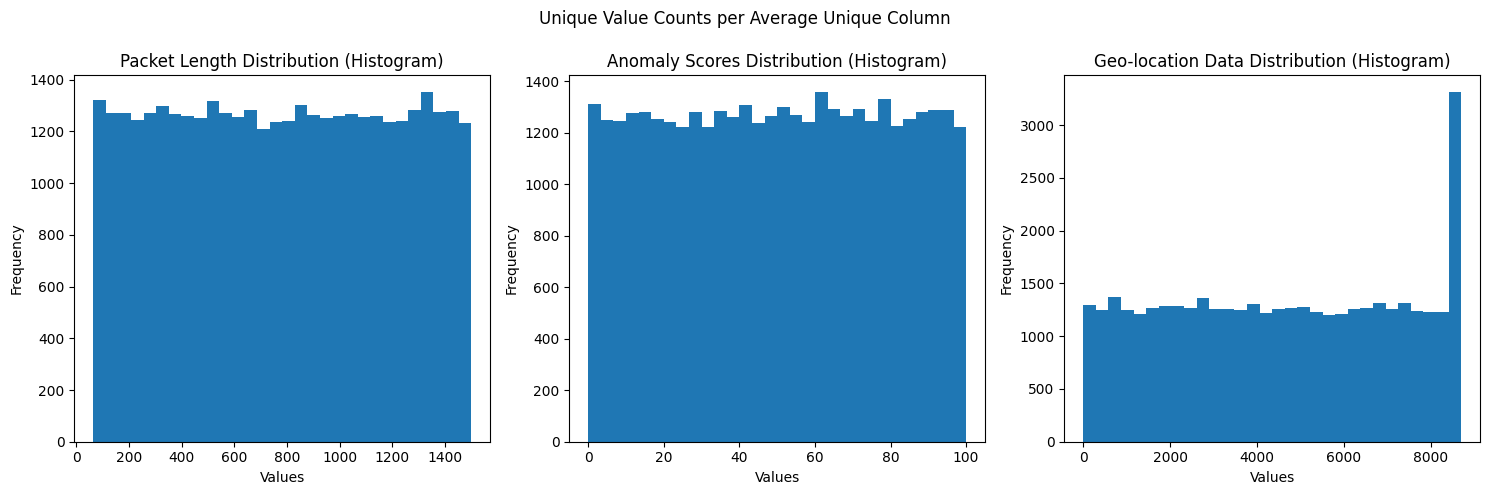

In [21]:
# Let's see the distribution of the unique datas of average unique data column in histogram graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
fig.suptitle('Unique Value Counts per Average Unique Column')

for idx, column in enumerate(average_unique.keys()):
    
    axes[idx].hist(new_df[column], bins=30)
    axes[idx].set_title(f'{column} Distribution (Histogram)')
    axes[idx].set_xlabel('Values')
    axes[idx].set_ylabel('Frequency')

# Grafikleri gösterme
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Başlık için alan bırakmak
plt.show()


<p style="color:#fcba03; font-size:18px">They seem to be dealt with.</p>

<p style="color:#fcba03; font-size:18px">Most Unique Data</p>

In [22]:
for column, values in (most_unique.items()):
    print(f"{column} have ".ljust(25), values, "unique data.")
    print("Here is the 5 head row of the column.")
    print(new_df[column].head())
    print()

Timestamp have            37986 unique data.
Here is the 5 head row of the column.
0    2023-05-30 06:33:58
1    2020-08-26 07:08:30
2    2022-11-13 08:23:25
3    2023-07-02 10:38:46
4    2023-07-16 13:11:07
Name: Timestamp, dtype: object

Source IP Address have    38107 unique data.
Here is the 5 head row of the column.
0     103.216.15.12
1    78.199.217.198
2      63.79.210.48
3               NaN
4     71.166.185.76
Name: Source IP Address, dtype: object

Destination IP Address have  38039 unique data.
Here is the 5 head row of the column.
0       84.9.164.252
1     66.191.137.154
2      198.219.82.17
3                NaN
4    189.243.174.238
Name: Destination IP Address, dtype: object

Source Port have          28709 unique data.
Here is the 5 head row of the column.
0    31225.0
1    17245.0
2    16811.0
3    20018.0
4     6131.0
Name: Source Port, dtype: float64

Destination Port have     28835 unique data.
Here is the 5 head row of the column.
0    17616.0
1    48166.0
2    5360

In [23]:
print("Most frequent top 3:")
for column, values in (most_unique.items()):
    print(new_df[column].value_counts().head(3))
    print(f"{column.ljust(15)} {values}")
    print()

Most frequent top 3:
Timestamp
2022-06-06 12:12:43    2
2022-06-11 14:28:15    2
2022-04-17 20:05:34    2
Name: count, dtype: int64
Timestamp       37986

Source IP Address
103.216.15.12      1
154.221.143.132    1
23.168.82.55       1
Name: count, dtype: int64
Source IP Address 38107

Destination IP Address
84.9.164.252     1
69.198.150.48    1
46.150.172.63    1
Name: count, dtype: int64
Destination IP Address 38039

Source Port
41341.0    6
47259.0    5
34763.0    5
Name: count, dtype: int64
Source Port     28709

Destination Port
7508.0     6
34117.0    6
30804.0    5
Name: count, dtype: int64
Destination Port 28835

Payload Data
Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.      1
Dignissimos ducimus et. Ratione accusantium exercitationem voluptas distinctio saepe.\nTempora pariatur asperiores adipisci asperiores aspernatur. Conseq

<p style="color:#fcba03; font-size:18px">So we can see that these columns have very different data from each other. At this point, these data cannot be estimated and filled in by looking at other data in the row or by looking at the average in the column. Here we will apply another approach. We have listed the top three of the most used data in each column. For diversity, we will store these values for each column and if there is NaN data in the column, we will randomly assign these values. We can even keep the top 20 most used data, not the top three, for real diversity. </p>

In [24]:
most_unique_values = {}
"""
most_unique_values:dict
{ column_name : [] } # column top 20 unique value
Timestamp              : timestamp values
Source IP Address      : ip address values
Destination IP Address : ip address values
Source Port            : port values as a float
Destination Port       : port values as a float
Payload Data           : payload data as a text
User Information       : user name surname as a text
Device Information     : device information as a text
Proxy Information      : ip address values
"""
for column in (most_unique.keys()):
    most_unique_values.update({ column: new_df[column].value_counts().head(20) })
    
# for item in most_unique_values:
#    print(item.ljust(20), ":", most_unique_values[item])

<p style="color:#fcba03; font-size:18px">
    Now we have,
    <ul style="color:#fcba03; font-size:18px">
        <li>few_unique_values that hold columns and their categoric data</li>        
        <li>average_unique that hold columns and their unique value count</li>        
        <li>most_unique_values that hold columns and top most 20 unique data</li>
    </ul>
</p>

In [25]:
new_df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225.0,17616.0,ICMP,503.0,Data,HTTP,NaN,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,3710,150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245.0,48166.0,ICMP,1174.0,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,NaN,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,1672,NaN,Log Data,NaN,NaN
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811.0,53600.0,UDP,306.0,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,1702,114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,NaN,NaN,20018.0,32534.0,UDP,385.0,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,3737,NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131.0,26646.0,TCP,1462.0,Data,DNS,NaN,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,577,149.6.110.119,NaN,Alert Data,Firewall
